<a href="https://colab.research.google.com/github/Risuo/Euler/blob/master/Wine_Quality_Dataset_Validation_%26_Selection_Focus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Like the project in Course 2, this project will consist of making simple predictions from structured data. However this time our goal is to deal with practical issues, such as training/test splits, avoiding overfitting, and validating that our results are significant. This notebook builds on the one developed in Course 2.

### What you will turn in: A Jupyter Notebook to predict binary and real-valued outputs from formatted data, and to validate those predictions (JSON/CSV --> predictions)

The dataset can be found here: http://archive.ics.uci.edu/ml/datasets/Wine+Quality and was compiled by Paulo Cortez, University of Minho, Portugal. 

The dataset is a collection of two wine varieties (red and white) of the Portuguese wine "Vinho Verde". There are 1599 entires under the red variety, and 4898 entries under the white variety. 

The collection is an assessment of 11 'Physiocochemical tests' performed on the wine, including: 

1 - fixed acidity 
2 - volatile acidity 
3 - citric acid 
4 - residual sugar 
5 - chlorides 
6 - free sulfur dioxide 
7 - total sulfur dioxide 
8 - density 
9 - pH 
10 - sulphates 
11 - alcohol 

And then there is a quality variable, based on an assessor (human) of the wine, from 0-10. 

We will be performing regression analysis utilizing a modified Mean-Squared-Error rating system to account for the 'quality' field being an integer value, and will be performing classification analysis against the mean rating of our wines. 




In [0]:
#/gdrive/My Drive/Wine Quality Data Set/winequality-red.csv
#/gdrive/My Drive/Wine Quality Data Set/winequality-white.csv

In [0]:
import csv
import numpy as np
from collections import defaultdict
import matplotlib
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd
from itertools import combinations as combinations


In [0]:
matplotlib.style.use('ggplot')

In [0]:
def create_full():
  dataset = []
  f = open("/gdrive/My Drive/Wine Quality Data Set/winequality-red.csv")
  header = f.readline()
  header = header.strip().split(';')
  header = [a.strip('"') for a in header] # Our dataset had "" around each of the features, which had to be pulled out
  
  g = open("/gdrive/My Drive/Wine Quality Data Set/winequality-white.csv")
  g_header = g.readline()
  g_header = g_header.strip().split(';')
  g_header = [a.strip('"') for a in g_header]

  dataset_red = []
  dataset_white = []
  
  
  for line in f:
    
    fields = line.strip().split(';')
    d = dict(zip(header, fields))
    for field in header:
      d[field] = float(d[field])  # We're converting all of our features into floats here
    dataset_red.append(d)
    
  for line in g:
    fields = line.strip().split(';')
    d = dict(zip(g_header, fields))
    for field in g_header:
      d[field] = float(d[field])
    dataset_white.append(d)
    
  return dataset_red, dataset_white

In [0]:
red, white = create_full()

In [15]:
red[0], white[0]

({'alcohol': 9.4,
  'chlorides': 0.076,
  'citric acid': 0.0,
  'density': 0.9978,
  'fixed acidity': 7.4,
  'free sulfur dioxide': 11.0,
  'pH': 3.51,
  'quality': 5.0,
  'residual sugar': 1.9,
  'sulphates': 0.56,
  'total sulfur dioxide': 34.0,
  'volatile acidity': 0.7},
 {'alcohol': 8.8,
  'chlorides': 0.045,
  'citric acid': 0.36,
  'density': 1.001,
  'fixed acidity': 7.0,
  'free sulfur dioxide': 45.0,
  'pH': 3.0,
  'quality': 6.0,
  'residual sugar': 20.7,
  'sulphates': 0.45,
  'total sulfur dioxide': 170.0,
  'volatile acidity': 0.27})

### So we've now got our cleaned and ready to go datasets. The data came in two parts, one for assessing the white wines, the second for the red wines. I will be keeping them separate for this project. 

### As noted in the comments, as far as cleaning was concerned, we had to strip out extra "" marks within the header data, and convert all the fields into floats, from strings. Very straightforward. 

### Also, as mentioned in the documentation paired with the dataset itself, there are zero missing values, so that eliminates a number of possible steps from needing to be performed. Onward!

In [16]:
# Here is some basic value-analysis on the datasets:

pd.set_option('display.expand_frame_repr',False)
red_df = pd.DataFrame(red)
white_df = pd.DataFrame(white)
print(red_df.head(), '\n\n',white_df.head())
print('\nmin/max alcohol Red:',min(red_df['alcohol']),max(red_df['alcohol']),'\nmin/max alcohol White:',min(white_df['alcohol']),max(white_df['alcohol']))
print('mean quality Red:',red_df['quality'].mean(), '\nmean quality White:',white_df['quality'].mean())
print('\n')

print('Red dataframe Describe:','\n',red_df.describe())
print('\nWhite dataframe Describe:','\n',white_df.describe())

   alcohol  chlorides  citric acid  density  fixed acidity  free sulfur dioxide    pH  quality  residual sugar  sulphates  total sulfur dioxide  volatile acidity
0      9.4      0.076         0.00   0.9978            7.4                 11.0  3.51      5.0             1.9       0.56                  34.0              0.70
1      9.8      0.098         0.00   0.9968            7.8                 25.0  3.20      5.0             2.6       0.68                  67.0              0.88
2      9.8      0.092         0.04   0.9970            7.8                 15.0  3.26      5.0             2.3       0.65                  54.0              0.76
3      9.8      0.075         0.56   0.9980           11.2                 17.0  3.16      6.0             1.9       0.58                  60.0              0.28
4      9.4      0.076         0.00   0.9978            7.4                 11.0  3.51      5.0             1.9       0.56                  34.0              0.70 

    alcohol  chlorides  ci

In [0]:
import random

In [0]:
redRandom = red
random.shuffle(redRandom)
whiteRandom = white
random.shuffle(whiteRandom)

In [19]:
redRandom[0],whiteRandom[0]

({'alcohol': 13.5666666666667,
  'chlorides': 0.048,
  'citric acid': 0.11,
  'density': 0.99182,
  'fixed acidity': 5.3,
  'free sulfur dioxide': 16.0,
  'pH': 3.54,
  'quality': 7.0,
  'residual sugar': 2.2,
  'sulphates': 0.88,
  'total sulfur dioxide': 89.0,
  'volatile acidity': 0.47},
 {'alcohol': 12.0,
  'chlorides': 0.04,
  'citric acid': 0.37,
  'density': 0.99009,
  'fixed acidity': 6.6,
  'free sulfur dioxide': 31.0,
  'pH': 3.15,
  'quality': 5.0,
  'residual sugar': 1.6,
  'sulphates': 0.66,
  'total sulfur dioxide': 101.0,
  'volatile acidity': 0.22})

In [0]:
def feature(datum):
  features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
  feat = []
  #print(datum)
  for i in datum:
    #print(i)
    if i in features:
      feat.append(datum[i])

  return feat

In [21]:
print(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'])
feature(redRandom[0])  

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


[5.3,
 0.47,
 0.11,
 2.2,
 0.048,
 16.0,
 89.0,
 0.99182,
 3.54,
 0.88,
 13.5666666666667]

### Our feature list is now organized in the following columns:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

In [0]:
X_red = [feature(d) for d in redRandom]
X_white = [feature(d) for d in whiteRandom]

In [0]:
y_red_classification = [d['quality']>5 for d in redRandom] #we'll concern ourselves with whether or not the quality is > the mean
y_white_classification = [d['quality']>5 for d in whiteRandom]

y_red_regression = [int(d['quality']) for d in redRandom]
y_white_regression = [int(d['quality']) for d in whiteRandom]

In [24]:
X_red[0], X_white[0]

([5.3,
  0.47,
  0.11,
  2.2,
  0.048,
  16.0,
  89.0,
  0.99182,
  3.54,
  0.88,
  13.5666666666667],
 [6.6, 0.22, 0.37, 1.6, 0.04, 31.0, 101.0, 0.99009, 3.15, 0.66, 12.0])

In [25]:
y_red_classification[0], y_white_regression[0]

(True, 5)

In [0]:
N = len(X_red)

X_red_train_classification = X_red[:75*N//100]
X_red_test_classification = X_red[75*N//100:]

y_red_train_classification = y_red_classification[:75*N//100]
y_red_test_classification = y_red_classification[75*N//100:]


X_red_train_regression = X_red[:6*N//10]
X_red_validation_regression = X_red[6*N//10:8*N//10]
X_red_test_regression = X_red[8*N//10:]

y_red_train_regression = y_red_regression[:6*N//10]
y_red_validation_regression = y_red_regression[6*N//10:8*N//10]
y_red_test_regression = y_red_regression[8*N//10:]


N = len(X_white)

X_white_train_classification = X_white[:75*N//100]
X_white_test_classification = X_white[75*N//100:]

y_white_train_classification = y_white_classification[:75*N//100]
y_white_test_classification = y_white_classification[75*N//100:]


X_white_train_regression = X_white[:6*N//10]
X_white_validation_regression = X_white[6*N//10:8*N//10]
X_white_test_regression =X_white[8*N//10:]

y_white_train_regression = y_white_regression[:6*N//10]
y_white_validation_regression = y_white_regression[6*N//10:8*N//10]
y_white_test_regression = y_white_regression[8*N//10:]




In [27]:
len(X_red_train_classification), len(X_red_test_classification)

(1199, 400)

In [28]:
len(y_red_train_regression), len(y_red_test_regression)

(959, 320)

In [29]:
len(X_white_train_regression), len(X_white_validation_regression), len(X_white_test_regression)

(2938, 980, 980)

In [30]:
len(y_white_train_classification), len(y_white_test_classification)

(3673, 1225)

### We now have two sets of data, red and white, have randomized them and then split into three parts, a train set (60% of N), and validation and test sets (20% of N each) for the red and the white in our regression, and a two-way split of 75%/25% for our classification. This will allow us to perform the same series of tests on two datasets, possibly showing us a limitation that the smaller dataset (reds) runs into while the parameters are otherwise the same between the sets. We have also created two feature collections, one for classification based off the mean quality value (higher or lower) and the second for regression (the int. value of the quality).

In [0]:
from sklearn import linear_model

In [0]:
def expand_range(value):
  return [value-.5, value+.49]

In [33]:
def MSE_rounding_label(a,b):
  low = expand_range(b)[0]
  mid = b
  high = expand_range(b)[1]
  lowDiff = (low-(abs(a)))**2
  midDiff = (mid-(abs(a)))**2
  highDiff = (high-(abs(a)))**2
  table = [lowDiff, midDiff, highDiff]
  if min(table) == lowDiff:
    return low
  if min(table) == midDiff:
    return mid
  if min(table) == highDiff:
    return high
    
print(MSE_rounding_label(2.63,3),MSE_rounding_label(2.49,3),MSE_rounding_label(2.89,3),MSE_rounding_label(3.24,3),MSE_rounding_label(3.85,3))

2.5 2.5 3 3 3.49


In [0]:
def MSE_rounding(model, X, y): # This is to be used for the Regression model. Since the model will predict float values, and the quality is an integer, we will choose to round to the nearest integer value
  predictions = model.predict(X)
  
  
  differences = [(round(a)-MSE_rounding_label(a,b))**2 for (a,b) in zip(predictions, y)]
  return sum(differences) / len(differences)

### As mentioned in the comments above, the two code-blocks immediately prior to this one contain the two-portions of our custom MSE rounding error.  I decided that since the model would be predicting float values, say for example 5.48, on a label that might be a 6, that affording it an error of .52 would be less representative of the actual accuracy than instead noting that had the model predicted a 5.5, the rounding would have yielded the correct label, i.e., the actual error was only .02. You will see below graphically how this affected the training/validation/test curves over a range of lambda values. 

In [0]:
def MSE_standard(model, X, y):
  predictions = model.predict(X)
  
  differences = [(a-b)**2 for (a,b) in zip(predictions, y)]
  return sum(differences) / len(differences)

In [0]:
def lambda_test_Ridge(lambdas, X_group, y_group): # lambdas: array of values, X_group: array of X-sets, y_group: array of y-sets  
  # BE SURE TO ORDER THE X_group and Y_group as follows: [TRAIN, VALIDATION]
  X_train = X_group[0]
  y_train = y_group[0]
  
  X_validation = X_group[1]
  y_validation = y_group[1]
  
  bestModel = None
  bestMSE = None
  
  
  for lambd in lambdas:
    model = linear_model.Ridge(lambd, fit_intercept=False)
    model.fit(X_train, y_train)
    
    mseTrain = MSE_rounding(model, X_train, y_train)
    mseValidation = MSE_rounding(model, X_validation, y_validation)
    
    print("lambda = " + str(lambd) + ", training/validation error = " + str(mseTrain) + '/' + str(mseValidation))
    if not bestModel or mseValidation < bestMSE:
      bestModel = model
      bestMSE = mseValidation
      
  return bestModel,bestModel.alpha 
  

In [0]:
def find_Lambda(X_group, y_group, refinementLevel): #takes our lambda_test variables plus a single additional variable, the number of times we'll refine down on our lambda, 
                                                    #i.e., the number of iterations through lambda_test_Ridge
  firstTest = np.geomspace(.001,1000, num=7)
  
  print("Base test:")
  bestModel, current_Lambda = lambda_test_Ridge(firstTest, X_group, y_group)
  print("Base test:", current_Lambda)
  
  for a in range(1,refinementLevel):
    low = current_Lambda-(current_Lambda/(a+1))
    high = current_Lambda+(current_Lambda/(a+1))
    current_Test = np.geomspace(low,high, num=9)
    bestModel, current_Lambda = lambda_test_Ridge(current_Test, X_group, y_group)
    print('Test:', a+1, bestModel, bestModel.alpha)
    
  return bestModel, bestModel.alpha
  


In [38]:
best_red_model_regression, red_Lambda = find_Lambda([X_red_train_regression, X_red_validation_regression], [y_red_train_regression, y_red_validation_regression],4)

Base test:
lambda = 0.001, training/validation error = 0.2149233576642336/0.2442856249999999
lambda = 0.01, training/validation error = 0.2149233576642336/0.2442856249999999
lambda = 0.1, training/validation error = 0.21935484880083433/0.24266062499999985
lambda = 1.0, training/validation error = 0.21836444212721595/0.23865718749999992
lambda = 10.0, training/validation error = 0.22730041710114726/0.24118718749999984
lambda = 100.0, training/validation error = 0.24056277372262777/0.24905968749999988
lambda = 1000.0, training/validation error = 0.25708050052137654/0.25952874999999975
Base test: 1.0
lambda = 0.5, training/validation error = 0.21818633993743494/0.2402512499999999
lambda = 0.5736013452199386, training/validation error = 0.21792565172054237/0.24175187499999992
lambda = 0.6580370064762462, training/validation error = 0.21917726798748713/0.24087656249999992
lambda = 0.7549018242385525, training/validation error = 0.21783232533889477/0.24087656249999992
lambda = 0.866025403784

In [39]:
best_white_model_regression, white_Lambda = find_Lambda([X_white_train_regression, X_white_validation_regression], [y_white_train_regression, y_white_validation_regression],4)

Base test:
lambda = 0.001, training/validation error = 0.3169180054458778/0.3276119387755109
lambda = 0.01, training/validation error = 0.3169180054458778/0.3276119387755109
lambda = 0.1, training/validation error = 0.31699285228045915/0.3296731632653067
lambda = 1.0, training/validation error = 0.3165402995234815/0.33571397959183735
lambda = 10.0, training/validation error = 0.3189773655547953/0.3462444897959191
lambda = 100.0, training/validation error = 0.338245881552072/0.3585402040816337
lambda = 1000.0, training/validation error = 0.3453283526208264/0.36490918367347036
Base test: 0.001
lambda = 0.0004999999999999999, training/validation error = 0.3169180054458778/0.3276119387755109
lambda = 0.0005736013452199385, training/validation error = 0.3169180054458778/0.3276119387755109
lambda = 0.0006580370064762462, training/validation error = 0.3169180054458778/0.3276119387755109
lambda = 0.0007549018242385525, training/validation error = 0.3169180054458778/0.3276119387755109
lambda = 

In [40]:
print('Red regression model:', best_red_model_regression, '\n\n', 'testing error red:', MSE_rounding(best_red_model_regression, X_red_test_regression, y_red_test_regression), '\n\n', 
      'White regression model:',best_white_model_regression, '\n\n', 'testing error white:', MSE_rounding(best_white_model_regression, X_white_test_regression, y_white_test_regression))

Red regression model: Ridge(alpha=1.109050740291396, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) 

 testing error red: 0.2638784374999997 

 White regression model: Ridge(alpha=0.00024999999999999995, copy_X=True, fit_intercept=False,
      max_iter=None, normalize=False, random_state=None, solver='auto',
      tol=0.001) 

 testing error white: 0.30394612244897956


## Now we're going to plot out our train/validation/test curves based on a range of lambda selection. 

In [0]:
def find_MSE_graph(X_group, y_group, alpha_low, alpha_high):
  X_train = X_group[0]
  y_train = y_group[0]
  
  X_validation = X_group[1]
  y_validation = y_group[1]
  
  X_test = X_group[2]
  y_test = y_group[2]
  
  lambdas = [a for a in np.arange(alpha_low,alpha_high,((alpha_high-alpha_low)/1000))]
  
  train_Errors = []
  validation_Errors = []
  test_Errors = []
  
  
  for lambd in lambdas:
    model = linear_model.Ridge(lambd, fit_intercept=False)
    model.fit(X_train, y_train)
    
    mseTrain = MSE_rounding(model, X_train, y_train)
    mseValidation = MSE_rounding(model, X_validation, y_validation)
    mseTest = MSE_rounding(model, X_test, y_test)
    
    train_Errors.append(mseTrain)
    validation_Errors.append(mseValidation)
    test_Errors.append(mseTest)
    
  return [train_Errors, validation_Errors, test_Errors]
    
    
  
  
  

In [0]:
def find_MSEStandard_graph(X_group, y_group, alpha_low, alpha_high):
  X_train = X_group[0]
  y_train = y_group[0]
  
  X_validation = X_group[1]
  y_validation = y_group[1]
  
  X_test = X_group[2]
  y_test = y_group[2]
  
  lambdas = [a for a in np.arange(alpha_low,alpha_high,((alpha_high-alpha_low)/1000))]
  
  train_Errors = []
  validation_Errors = []
  test_Errors = []
  
  
  for lambd in lambdas:
    model = linear_model.Ridge(lambd, fit_intercept=False)
    model.fit(X_train, y_train)
    
    mseTrain = MSE_standard(model, X_train, y_train)
    mseValidation = MSE_standard(model, X_validation, y_validation)
    mseTest = MSE_standard(model, X_test, y_test)
    
    train_Errors.append(mseTrain)
    validation_Errors.append(mseValidation)
    test_Errors.append(mseTest)
    
  return [train_Errors, validation_Errors, test_Errors]

In [0]:
mseTable_Red = find_MSE_graph([X_red_train_regression, X_red_validation_regression, X_red_test_regression], [y_red_train_regression, y_red_validation_regression, y_red_test_regression],.001, 250)

In [0]:
mseTable_White = find_MSE_graph([X_white_train_regression, X_white_validation_regression, X_white_test_regression], [y_white_train_regression, y_white_validation_regression, y_white_test_regression],.001, 250)

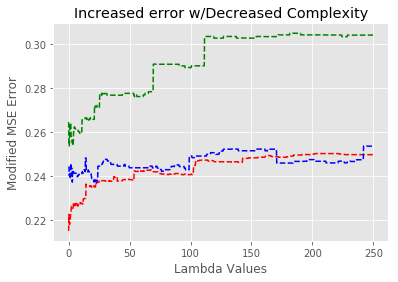

In [46]:
training_Values_Red = mseTable_Red[0]
validation_Values_Red = mseTable_Red[1]
testing_Values_Red = mseTable_Red[2]

t = np.arange(.001, 250, ((250-.001)/1000))

plt.plot(t,training_Values_Red,'r--',t,validation_Values_Red,'b--',t,testing_Values_Red,'g--')
plt.xlabel("Lambda Values")
plt.ylabel("Modified MSE Error")
plt.title("Increased error w/Decreased Complexity")
plt.show()

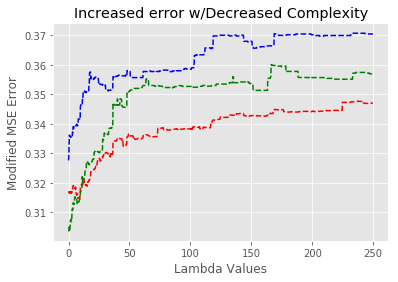

In [47]:
training_Values_White = mseTable_White[0]
validation_Values_White = mseTable_White[1]
testing_Values_White = mseTable_White[2]

t = np.arange(.001, 250, ((250-.001)/1000))

plt.plot(t,training_Values_White,'r--',t,validation_Values_White,'b--',t,testing_Values_White,'g--')
plt.xlabel("Lambda Values")
plt.ylabel("Modified MSE Error")
plt.title("Increased error w/Decreased Complexity")
plt.show()

## The above isn't bad, but perhaps we should check it out a little closer.

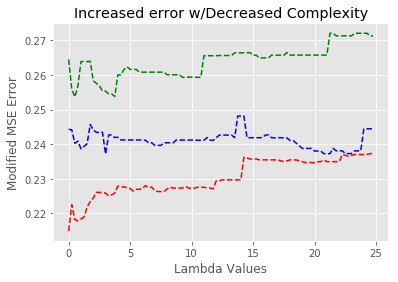

In [48]:
training_Values_Red = mseTable_Red[0][0:100]
validation_Values_Red = mseTable_Red[1][0:100]
testing_Values_Red = mseTable_Red[2][0:100]

t = np.arange(.001, 250, ((250-.001)/1000))

t = t[0:100]

plt.plot(t,training_Values_Red,'r--',t,validation_Values_Red,'b--',t,testing_Values_Red,'g--')
plt.xlabel("Lambda Values")
plt.ylabel("Modified MSE Error")
plt.title("Increased error w/Decreased Complexity")
plt.show()


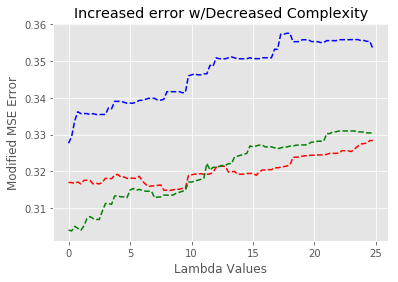

In [49]:
training_Values_White = mseTable_White[0][0:100]
validation_Values_White = mseTable_White[1][0:100]
testing_Values_White = mseTable_White[2][0:100]

t = np.arange(.001, 250, ((250-.001)/1000))

t = t[0:100]

plt.plot(t,training_Values_White,'r--',t,validation_Values_White,'b--',t,testing_Values_White,'g--')
plt.xlabel("Lambda Values")
plt.ylabel("Modified MSE Error")
plt.title("Increased error w/Decreased Complexity")
plt.show()

## Enhance...

In [0]:
mseTable_Red = find_MSE_graph([X_red_train_regression, X_red_validation_regression, X_red_test_regression], [y_red_train_regression, y_red_validation_regression, y_red_test_regression],.0001, 5)

In [0]:
mseTable_White = find_MSE_graph([X_white_train_regression, X_white_validation_regression, X_white_test_regression], [y_white_train_regression, y_white_validation_regression, y_white_test_regression],.0001, 5)

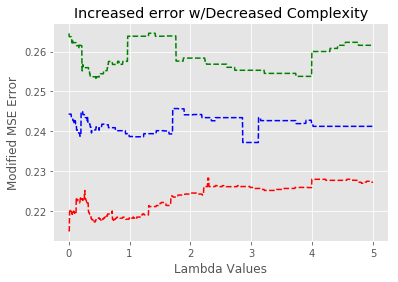

In [52]:
training_Values_Red = mseTable_Red[0]
validation_Values_Red = mseTable_Red[1]
testing_Values_Red = mseTable_Red[2]

t = np.arange(.0001, 5, ((5-.0001)/1000))

plt.plot(t,training_Values_Red,'r--',t,validation_Values_Red,'b--',t,testing_Values_Red,'g--')
plt.xlabel("Lambda Values")
plt.ylabel("Modified MSE Error")
plt.title("Increased error w/Decreased Complexity")
plt.show()

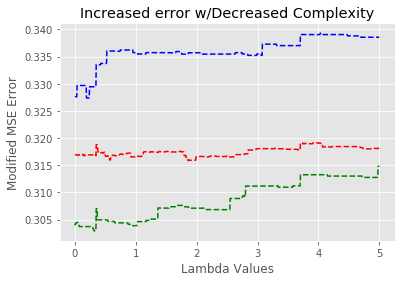

In [53]:
training_Values_White = mseTable_White[0]
validation_Values_White = mseTable_White[1]
testing_Values_White = mseTable_White[2]

t = np.arange(.0001, 5, ((5-.0001)/1000))

plt.plot(t,training_Values_White,'r--',t,validation_Values_White,'b--',t,testing_Values_White,'g--')
plt.xlabel("Lambda Values")
plt.ylabel("Modified MSE Error")
plt.title("Increased error w/Decreased Complexity")
plt.show()

# ENHANCE

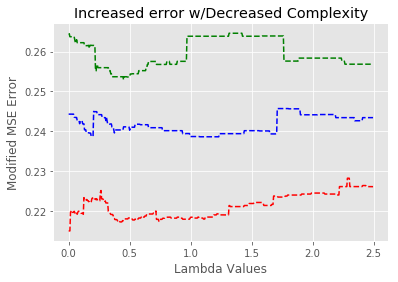

In [58]:
training_Values_Red = mseTable_Red[0][0:500]
validation_Values_Red = mseTable_Red[1][0:500]
testing_Values_Red = mseTable_Red[2][0:500]

t = np.arange(.0001, 5, ((5-.0001)/1000))

t = t[0:500]

plt.plot(t,training_Values_Red,'r--',t,validation_Values_Red,'b--',t,testing_Values_Red,'g--')
plt.xlabel("Lambda Values")
plt.ylabel("Modified MSE Error")
plt.title("Increased error w/Decreased Complexity")
plt.show()


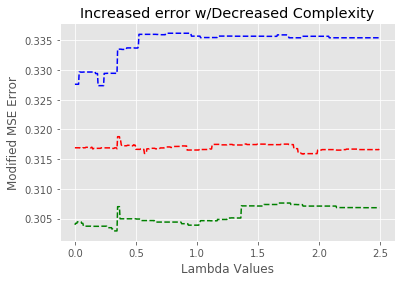

In [59]:
training_Values_White = mseTable_White[0][0:500]
validation_Values_White = mseTable_White[1][0:500]
testing_Values_White = mseTable_White[2][0:500]

t = np.arange(.0001, 5, ((5-.0001)/1000))

t = t[0:500]

plt.plot(t,training_Values_White,'r--',t,validation_Values_White,'b--',t,testing_Values_White,'g--')
plt.xlabel("Lambda Values")
plt.ylabel("Modified MSE Error")
plt.title("Increased error w/Decreased Complexity")
plt.show()

# Two very interesting things are going on here. Our graphs aren't following the predicted 'ideal' graph provided in the lecture, and I believe this is largely due to the fact that our sample size is violating one of the tenants mentioned in the lecture, namely, that the datasets be LARGE.  1599 and 4989 are indeed not particularly large datasets.  

# As an exercise, below are the same two graphs, but utilizing a standard MSE error rating, without any of the rounding/range insertion that is reflected above. 

In [0]:
mseTable_Red = find_MSEStandard_graph([X_red_train_regression, X_red_validation_regression, X_red_test_regression], [y_red_train_regression, y_red_validation_regression, y_red_test_regression],.0001, 5)

In [0]:
mseTable_White = find_MSEStandard_graph([X_white_train_regression, X_white_validation_regression, X_white_test_regression], [y_white_train_regression, y_white_validation_regression, y_white_test_regression],.0001, 5)

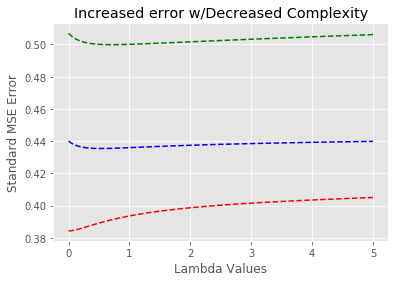

In [67]:
training_Values_Red = mseTable_Red[0]
validation_Values_Red = mseTable_Red[1]
testing_Values_Red = mseTable_Red[2]

t = np.arange(.0001, 5, ((5-.0001)/1000))

plt.plot(t,training_Values_Red,'r--',t,validation_Values_Red,'b--',t,testing_Values_Red,'g--')
plt.xlabel("Lambda Values")
plt.ylabel("Standard MSE Error")
plt.title("Increased error w/Decreased Complexity")
plt.show()

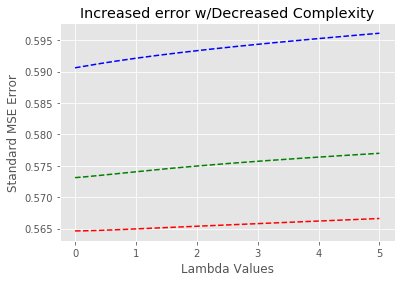

In [68]:
training_Values_White = mseTable_White[0]
validation_Values_White = mseTable_White[1]
testing_Values_White = mseTable_White[2]

t = np.arange(.0001, 5, ((5-.0001)/1000))

plt.plot(t,training_Values_White,'r--',t,validation_Values_White,'b--',t,testing_Values_White,'g--')
plt.xlabel("Lambda Values")
plt.ylabel("Standard MSE Error")
plt.title("Increased error w/Decreased Complexity")
plt.show()

# Since the MSE isn't really applicable to the actually predictive nature of the model, these graphs are largely useless, but all the same they still show a very clear bias against decreased complexity through a larger Lambda value. 

# I believe the largest take-away from this is that using all of the features leads to an over-reliance on the size of the dataset, and that it is simply too small (given the number of features) to be able to yield the predicted error curves over lambda. 

In [0]:
def precisionAtK(K, y_sorted):
  return sum(y_sorted[:K])/K

In [0]:
def recallAtK(K, y_sorted):
  return sum(y_sorted[:K]) / sum(y_sorted)

In [0]:
def precisionAndRecallSuite(y_sorted):
  return [precisionAtK(int(len(y_sorted)/10),y_sorted), precisionAtK(int(len(y_sorted)/5),y_sorted), precisionAtK(int(len(y_sorted)/2),y_sorted)], [recallAtK(int(len(y_sorted)/10),y_sorted), recallAtK(int(len(y_sorted)/5),y_sorted), recallAtK(int(len(y_sorted)/2), y_sorted)]

In [0]:
def linear_Logistic_confidence_model(X_train, y_train, X_test, y_test):

  model = linear_model.LogisticRegression(solver='lbfgs')
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  confidences = model.decision_function(X_test)
  confidenceAndLabels = list(zip(confidences, y_test))
  confidenceAndLabels.sort()
  confidenceAndLabels.reverse()
  labelsRankedByConfidence = [z[1] for z in confidenceAndLabels]
  
  precision, recall = precisionAndRecallSuite(labelsRankedByConfidence)
  
  print("Our precision at K values of the first 10%, 20%, and 50% of our test set are:", precision[0]*100, precision[1]*100, precision[2]*100, '\n',
        "And our recall at K values of the first 10%, 20%, and 50% of our test set are:", recall[0]*100, recall[1]*100, precision[2]*100, '\n\n')
  return evaluationSuite(predictions, y_test)

In [0]:
def evaluationSuite(predictions, labels): # NOTE: This only works for Classification problems. 
  
  TP = sum([(p and l) for (p,l) in zip(predictions,labels)])
  FP = sum([(p and not l) for (p,l) in zip(predictions,labels)])
  TN = sum([(not p and not l) for (p,l) in zip(predictions,labels)])
  FN = sum([(not p and l) for (p,l) in zip(predictions,labels)])
  
  Accuracy = (TP + TN)/(TP + FP + TN + FN)
  TPR = (TP / (TP + FN))
  TNR = (TN / (TN + FP))
  BER = (1- (1/2 * (TPR + TNR)))
  Precision = (TP/(TP + FP))
  Recall = (TP/(TP + FN))
  F1 = 2 * (Precision * Recall) / (Precision + Recall) # This is the Harmonic Mean of the two values Precision & Recall
  
  return ["Size=",(TP+FP+TN+FN),"True Positives=",TP,"False Positives=",FP,"True Negatives=",TN,"False Negatives=",FN,"Accuracy=",Accuracy,"True Positive Rate=",TPR,"True Negative Rate=",TNR,"Balanced Error Rate=",BER,
         "Precision=", Precision, "Recall=", Recall, "F1=", F1]

In [78]:
print("White wine values:")
white_Suite = linear_Logistic_confidence_model(X_white_train_classification, y_white_train_classification, X_white_test_classification, y_white_test_classification)
print("Red wine values:")
red_Suite = linear_Logistic_confidence_model(X_red_train_classification, y_red_train_classification, X_red_test_classification, y_red_test_classification)

White wine values:
Our precision at K values of the first 10%, 20%, and 50% of our test set are: 97.54098360655738 95.91836734693877 86.27450980392157 
 And our recall at K values of the first 10%, 20%, and 50% of our test set are: 14.819427148194272 29.265255292652554 86.27450980392157 


Red wine values:
Our precision at K values of the first 10%, 20%, and 50% of our test set are: 92.5 88.75 71.5 
 And our recall at K values of the first 10%, 20%, and 50% of our test set are: 17.703349282296653 33.97129186602871 71.5 




/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [79]:
white_Suite

['Size=',
 1225,
 'True Positives=',
 725,
 'False Positives=',
 223,
 'True Negatives=',
 199,
 'False Negatives=',
 78,
 'Accuracy=',
 0.7542857142857143,
 'True Positive Rate=',
 0.9028642590286425,
 'True Negative Rate=',
 0.471563981042654,
 'Balanced Error Rate=',
 0.3127858799643517,
 'Precision=',
 0.7647679324894515,
 'Recall=',
 0.9028642590286425,
 'F1=',
 0.8280982295830953]

In [80]:
red_Suite

['Size=',
 400,
 'True Positives=',
 157,
 'False Positives=',
 66,
 'True Negatives=',
 125,
 'False Negatives=',
 52,
 'Accuracy=',
 0.705,
 'True Positive Rate=',
 0.7511961722488039,
 'True Negative Rate=',
 0.6544502617801047,
 'Balanced Error Rate=',
 0.29717678298554573,
 'Precision=',
 0.7040358744394619,
 'Recall=',
 0.7511961722488039,
 'F1=',
 0.7268518518518519]

# At this point we have run our evaluation suite, along with a Precision and Recall at various values of K on our White wine and Red wine datasets. Overwhelmingly, I believe the datasets are both, generally speaking, lacking in size and scale. We have seen that the implementation of a regularizer is effective at improving the accuracy of our model in the regression portion, but again our curves diverge significantly from the expected hypothetical curves. I believe this is due to the small size of our datasets.  

# Our evaluation suite on the classification side of things shows us that in all honesty, our system is not doing a great job of identifying whether or not a particular wine will be better than the mean. I believe this can be improved upon by utilizing some feature selection, but that will have to wait for a later project. 

# Both the Regression & Classification models are decently accurate, and the regression model, interestingly, produces significantly varried alpha (lambda) values depending on the randomization of the datasets. I believe this is almost definitely due to the size of the dataset, and would dissapear on a larger sample-size. 